## Script to plot PCA, UMAP, tSNE on NA free metpertWTproteomics dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import umap
import os
from sklearn.preprocessing import StandardScaler

sns.set(style='whitegrid', context='notebook', font='Arial')


/Users/aulakhs/anaconda3/envs/ML/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 Colour Key 

In [2]:
colkey_BioSpecID = {
    'AllEle 1': "#EEE0E5",
    'Ca 0': "#BCD2EE",
    'Ca 0.01': "#A8C6E6",
    'Ca 0.02': "#94BBDF",
    'Ca 0.05': "#81B0D8",
    'Ca 0.1': "#6DA4D1",
    'Ca 0.2': "#5999C9",
    'Ca 0.5': "#468EC2",
    'Ca 2': "#3283BB",
    'Ca 5': "#1F78B4",
    'Cu 0': "#90EE90",
    'Cu 0.01': "#86E586",
    'Cu 0.02': "#7DDD7D",
    'Cu 0.05': "#74D574",
    'Cu 0.1': "#6BCD6B",
    'Cu 0.2': "#62C462",
    'Cu 0.5': "#59BC59",
    'Cu 2': "#4FB44F",
    'Cu 5': "#46AC46",
    'Cu 10': "#3DA33D",
    'Cu 20': "#349B34",
    'Cu 50': "#2B932B",
    'Cu 100': "#228B22",
    'Fe 0': "#F08080",
    'Fe 0.01': "#EA7777",
    'Fe 0.02': "#E56E6F",
    'Fe 0.05': "#E06567",
    'Fe 0.1': "#DA5D5F",
    'Fe 0.2': "#D55457",
    'Fe 0.5': "#D04B4F",
    'Fe 2': "#CA4247",
    'Fe 5': "#C53A3F",
    'Fe 10': "#C03137",
    'Fe 20': "#BA282F",
    'Fe 50': "#B51F27",
    'Fe 100': "#B0171F",
    'K 0.1': "#CDC9C9",
    'K 0.2': "#B6B3B3",
    'K 0.5': "#9F9D9D",
    'K 2': "#888686",
    'K 5': "#717171",
    'K 10': "#5B5B5B",
    'Mg 0.05': "#E3A869",
    'Mg 0.1': "#D89B5E",
    'Mg 0.2': "#CC8F53",
    'Mg 0.5': "#C28248",
    'Mg 2': "#B6763E",
    'Mg 5': "#AB6A33",
    'Mg 10': "#A15D28",
    'Mg 20': "#95511D",
    'Mg 50': "#8B4513",
    'Mn 0': "#FFE1FF",
    'Mn 0.01': "#F2D3F6",
    'Mn 0.02': "#E6C5EE",
    'Mn 0.05': "#D9B8E5",
    'Mn 0.1': "#CDAADD",
    'Mn 0.2': "#C09CD4",
    'Mn 0.5': "#B48FCC",
    'Mn 2': "#A881C4",
    'Mn 5': "#9B73BB",
    'Mn 10': "#8F66B3",
    'Mn 20': "#8258AA",
    'Mn 50': "#764AA2",
    'Mn 100': "#6A3D9A",
    'Mo 0': "#40E0D0",
    'Mo 0.01': "#3AD8C9",
    'Mo 0.02': "#35D0C2",
    'Mo 0.05': "#30C8BC",
    'Mo 0.1': "#2AC0B5",
    'Mo 0.2': "#25B8AE",
    'Mo 0.5': "#20B0A8",
    'Mo 2': "#1AA8A1",
    'Mo 5': "#15A09A",
    'Mo 10': "#109893",
    'Mo 20': "#0A908D",
    'Mo 50': "#058886",
    'Mo 100': "#008080",
    'Na 0': "#FFEC8B",
    'Na 0.01': "#FDE57F",
    'Na 0.02': "#FCDE73",
    'Na 0.05': "#FAD768",
    'Na 0.1': "#F9D05C",
    'Na 0.2': "#F7C951",
    'Na 0.5': "#F6C345",
    'Na 2': "#F5BC39",
    'Na 5': "#F3B52E",
    'Na 10': "#F2AE22",
    'Na 20': "#F0A717",
    'Na 50': "#EFA00B",
    'Na 100': "#EE9A00",
    'Zn 0': "#CAE1FF",
    'Zn 2e-04': "#BACFF5",
    'Zn 0.01': "#AABEEB",
    'Zn 0.02': "#9BADE1",
    'Zn 0.05': "#8B9BD7",
    'Zn 0.1': "#7C8ACE",
    'Zn 0.2': "#6C79C4",
    'Zn 0.5': "#5D67BA",
    'Zn 2': "#4D56B0",
    'Zn 5': "#3E45A7",
    'Zn 10': "#2E339D",
    'Zn 20': "#1F2293",
    'Zn 50': "#0F1189",
    'Zn 100': "#000080",
}

In [3]:
# metal order

metal_order = [
    'Ca 0', 'Ca 0.01', 'Ca 0.02', 'Ca 0.05', 'Ca 0.1', 'Ca 0.2', 'Ca 0.5', 'Ca 2', 
    'Cu 0', 'Cu 0.01', 'Cu 0.02', 'Cu 0.05', 'Cu 0.1', 'Cu 0.2', 'Cu 0.5',  'Cu 2', 'Cu 5', 'Cu 10', 'Cu 20', 'Cu 50', 'Cu 100', 
    'Fe 0', 'Fe 0.01', 'Fe 0.02', 'Fe 0.05', 'Fe 0.1', 'Fe 0.2', 'Fe 0.5','Fe 2', 'Fe 5', 'Fe 10', 'Fe 20', 
    'K 0.1', 'K 0.2', 'K 0.5', 'K 2', 'K 5', 'K 10', 'Mg 0.05', 'Mg 0.1', 'Mg 0.2', 'Mg 0.5', 'Mg 2',
    'Mg 5', 'Mg 10', 'Mg 20', 'Mg 50', 'Mn 0', 'Mn 0.01', 'Mn 0.02', 'Mn 0.05', 'Mn 0.1', 'Mn 0.2', 'Mn 0.5',
    'Mn 2', 'Mn 5', 'Mn 10', 'Mn 20', 'Mn 50', 'Mn 100', 'Mo 0', 'Mo 0.01', 'Mo 0.02', 'Mo 0.05', 'Mo 0.1',
    'Mo 0.2', 'Mo 0.5', 'Mo 2', 'Mo 5', 'Mo 10', 'Mo 20', 'Mo 50', 'Mo 100', 'Na 0', 'Na 0.01', 'Na 0.02',
    'Na 0.05', 'Na 0.1', 'Na 0.2', 'Na 0.5', 'Na 2', 'Na 5', 'Na 10', 'Na 20', 'Na 50', 'Na 100', 'Zn 0',
    'Zn 2e-04', 'Zn 0.01', 'Zn 0.02', 'Zn 0.05', 'Zn 0.1', 'Zn 0.2', 'Zn 0.5', 'Zn 2', 'Zn 5', 'Zn 10',
    'Zn 20', 'Zn 50', 'Zn 100'
]

### Input NA free data

In [4]:
file_path = "/Users/aulakhs/Documents/RalserLab/metallica/experiment_data/metpert_WTproteomics/output/tables/completematrix/allmetals/allsamples/Protein Quantities wImpValues FullMatrix.csv"


In [5]:
prot_data = pd.read_csv(file_path)
prot_data.columns

Index(['File.Name', 'Protein.Ids', 'Protein.Quantity',
       'Log2(Protein.Quantity)', 'Layout', 'TimePoint', 'LO_TP',
       'Digestion_Batch', 'Element', 'Element.Concentration', 'BioSpecID',
       'Date', 'Time', 'Sample.Type', 'DateTime', 'order'],
      dtype='object')

In [6]:
selected_columns = ['BioSpecID', 'Log2(Protein.Quantity)','Protein.Ids']
prot_data_selected = prot_data[selected_columns]

# Create a pivot table
pivot_table = prot_data_selected.pivot_table(index='BioSpecID', 
                                             columns= 'Protein.Ids',
                                             values='Log2(Protein.Quantity)',
                                             aggfunc='median')


In [7]:
pivot_table

Protein.Ids,A5Z2X5,O13297,O13563,O14455,O14467,O43137,O74700,P00128,P00330,P00358,...,Q99216,Q99234,Q99258,Q99260,Q99287,Q99297,Q99312,Q99321,Q99383,Q99394
BioSpecID,,,,,,,,,,,,,,,,,,,,,
AllEle 1,8.229831,6.720032,7.391601,9.096798,10.027170,9.637790,6.289264,8.481863,14.056357,11.872616,...,5.719155,7.907002,8.137060,7.850861,6.692080,6.971166,7.172322,6.816498,6.864259,5.266601
Ca 0,7.641582,5.403323,7.544828,9.370105,9.674850,9.314252,6.861854,8.379595,15.459242,11.595554,...,6.137189,6.142989,8.236263,7.359612,7.088055,7.066361,6.841953,6.832116,5.870964,5.527011
Ca 0.01,7.713005,6.005138,7.805725,9.129597,9.686026,9.092625,6.495469,8.622401,14.919411,11.675184,...,5.630766,6.729965,8.358689,7.700001,7.065114,6.963023,6.933950,6.908515,6.361349,4.909267
Ca 0.02,7.761876,6.744369,7.590786,9.131148,9.783267,9.533365,6.690614,8.442578,15.210251,11.535958,...,6.175656,7.191320,8.336628,7.545340,7.184774,6.851790,6.470536,7.133752,5.666742,3.806206
Ca 0.05,7.458855,6.488989,7.806026,9.213652,9.795722,9.446730,6.107054,8.649408,15.025332,11.582370,...,6.201121,7.092955,8.144298,7.334577,6.982255,7.067168,7.044890,6.971954,6.208889,5.090727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zn 100,7.855159,6.781583,7.638902,9.331690,9.956752,9.651076,5.926287,8.304503,14.520540,11.670743,...,6.690494,7.366206,8.286682,7.391721,6.803785,7.142674,7.084647,7.110383,6.527776,5.158056
Zn 2,7.806402,6.701682,7.352297,9.207279,10.132889,9.704961,5.770972,8.671475,14.520519,11.818326,...,5.806781,7.873642,8.020000,7.830975,7.004913,7.105746,7.266770,6.897986,6.580171,4.944671
Zn 20,7.682832,6.742129,7.578254,9.276133,10.065260,9.833570,5.994303,8.540884,14.536313,11.785407,...,6.125777,7.132766,8.296508,7.715066,7.068661,7.092345,7.168402,6.798642,6.425197,4.788205


In [8]:
## scale data using standard scalar
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_table)
scaled_data       

array([[ 0.50786702,  0.05025709, -0.11619618, ..., -0.03694316,
         0.15590194,  0.35561809],
       [-0.98512055, -3.79505735,  0.46480316, ...,  0.02857288,
        -2.1816011 ,  0.90944681],
       [-0.80384715, -2.03751876,  1.45406545, ...,  0.34906474,
        -1.02758644, -0.40434452],
       ...,
       [-0.88042653,  0.11478867,  0.59154969, ..., -0.11184895,
        -0.87733538, -0.66181329],
       [-0.72415225, -0.8196459 ,  0.96537858, ...,  0.14662305,
        -0.62161503,  0.06362685],
       [-0.43664377,  1.04149599, -0.47947371, ..., -0.32742224,
        -0.34367043, -0.52215583]])

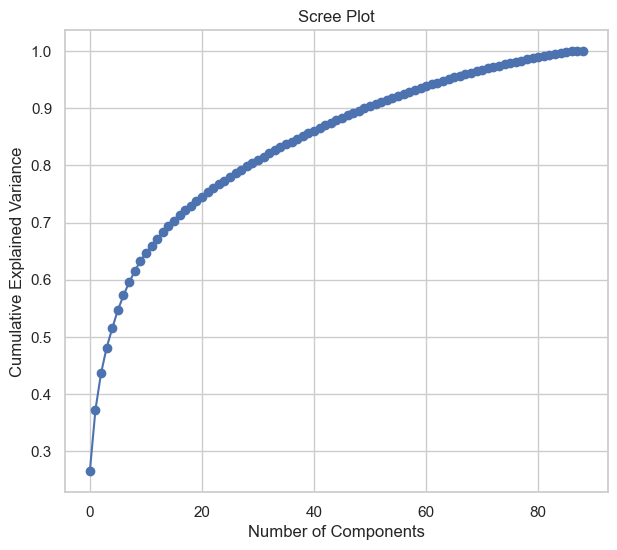

In [9]:
# Perform PCA analysis without specifying the number of components
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(7, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.savefig('/Users/aulakhs/Documents/RalserLab/metallica/experiment_data/metpert_WTproteomics/output/plots/completematrix/allmetals/PCA_proteome_allsamples_scree.pdf')
plt.show()

In [10]:

# Create a scatter plot with colors based on BioSpec IDs
colors = [colkey_BioSpecID.get(bs, 'gray') for bs in pivot_table.index]


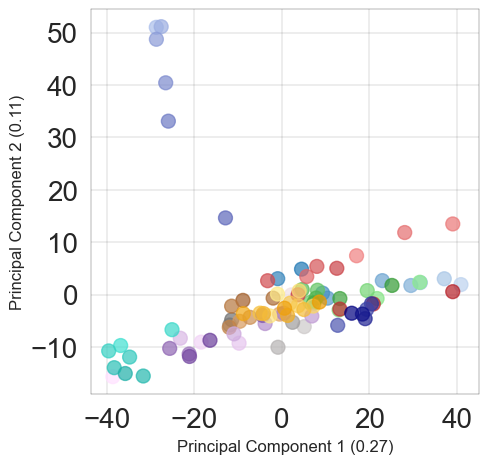

In [11]:
plt.figure(figsize=(5, 5))

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, s = 100, alpha= 0.7)

plt.xlabel(f'Principal Component 1 ({round(explained_variance_ratio[0], 2)})')
plt.ylabel(f'Principal Component 2 ({round(explained_variance_ratio[1], 2)})')

# Customize the axis ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Increase the linewidth of grid lines
plt.grid(color = "black",linewidth=0.1)

# Customize the outer square
plt.gca().spines['top'].set_linewidth(0.2)
plt.gca().spines['right'].set_linewidth(0.2)
plt.gca().spines['bottom'].set_linewidth(0.2)
plt.gca().spines['left'].set_linewidth(0.2)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    
plt.savefig('/Users/aulakhs/Documents/RalserLab/metallica/experiment_data/metpert_WTproteomics/output/plots/completematrix/allmetals/PCA_proteome_allsamples_pc1vspc2.pdf')
plt.show()


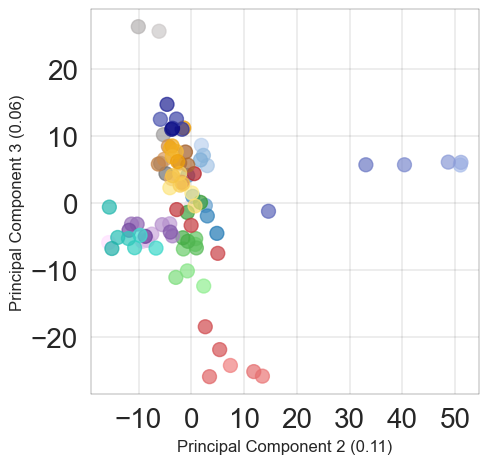

In [12]:
plt.figure(figsize = (5, 5))

plt.scatter(pca_result[:, 1], pca_result[:, 2], c = colors, s = 100, alpha= 0.7)


plt.xlabel(f'Principal Component 2 ({round(explained_variance_ratio[1], 2)})')
plt.ylabel(f'Principal Component 3 ({round(explained_variance_ratio[2], 2)})')

# Customize the axis ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Increase the linewidth of grid lines
plt.grid(color = "black",linewidth=0.1)

# Customize the outer square
plt.gca().spines['top'].set_linewidth(0.2)
plt.gca().spines['right'].set_linewidth(0.2)
plt.gca().spines['bottom'].set_linewidth(0.2)
plt.gca().spines['left'].set_linewidth(0.2)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    
plt.savefig('/Users/aulakhs/Documents/RalserLab/metallica/experiment_data/metpert_WTproteomics/output/plots/completematrix/allmetals/PCA_proteome_allsamples_pc2vspc3.pdf')
plt.show()


## Calculate proteome similarity metrics

In [13]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity, manhattan_distances
from scipy.spatial import distance, distance_matrix
from scipy.linalg import inv

In [14]:
pivot_table

Protein.Ids,A5Z2X5,O13297,O13563,O14455,O14467,O43137,O74700,P00128,P00330,P00358,...,Q99216,Q99234,Q99258,Q99260,Q99287,Q99297,Q99312,Q99321,Q99383,Q99394
BioSpecID,,,,,,,,,,,,,,,,,,,,,
AllEle 1,8.229831,6.720032,7.391601,9.096798,10.027170,9.637790,6.289264,8.481863,14.056357,11.872616,...,5.719155,7.907002,8.137060,7.850861,6.692080,6.971166,7.172322,6.816498,6.864259,5.266601
Ca 0,7.641582,5.403323,7.544828,9.370105,9.674850,9.314252,6.861854,8.379595,15.459242,11.595554,...,6.137189,6.142989,8.236263,7.359612,7.088055,7.066361,6.841953,6.832116,5.870964,5.527011
Ca 0.01,7.713005,6.005138,7.805725,9.129597,9.686026,9.092625,6.495469,8.622401,14.919411,11.675184,...,5.630766,6.729965,8.358689,7.700001,7.065114,6.963023,6.933950,6.908515,6.361349,4.909267
Ca 0.02,7.761876,6.744369,7.590786,9.131148,9.783267,9.533365,6.690614,8.442578,15.210251,11.535958,...,6.175656,7.191320,8.336628,7.545340,7.184774,6.851790,6.470536,7.133752,5.666742,3.806206
Ca 0.05,7.458855,6.488989,7.806026,9.213652,9.795722,9.446730,6.107054,8.649408,15.025332,11.582370,...,6.201121,7.092955,8.144298,7.334577,6.982255,7.067168,7.044890,6.971954,6.208889,5.090727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zn 100,7.855159,6.781583,7.638902,9.331690,9.956752,9.651076,5.926287,8.304503,14.520540,11.670743,...,6.690494,7.366206,8.286682,7.391721,6.803785,7.142674,7.084647,7.110383,6.527776,5.158056
Zn 2,7.806402,6.701682,7.352297,9.207279,10.132889,9.704961,5.770972,8.671475,14.520519,11.818326,...,5.806781,7.873642,8.020000,7.830975,7.004913,7.105746,7.266770,6.897986,6.580171,4.944671
Zn 20,7.682832,6.742129,7.578254,9.276133,10.065260,9.833570,5.994303,8.540884,14.536313,11.785407,...,6.125777,7.132766,8.296508,7.715066,7.068661,7.092345,7.168402,6.798642,6.425197,4.788205


In [15]:
# Exponentiate to get back to the original values
sample_values = 2 ** pivot_table  
allEle_row = 2 ** pivot_table.loc["AllEle 1"] 

# Perform the division
normalized_values = sample_values.divide(allEle_row, axis=1)

# Apply the log2 transformation to the result
normalized_log2_values = np.log2(normalized_values)

# Drop "AllEle 1" row if needed
normalized_df = normalized_log2_values.drop("AllEle 1", axis=0)


In [16]:

# Calculate Pearson Correlation Coefficient between rows (samples)
pearson_corr = normalized_df.T.corr()

# Calculate Spearman Rank Correlation between rows (samples)
spearman_corr = normalized_df.T.corr(method='spearman')

# Calculate Euclidean Distance between rows (samples)
euclidean_dist = euclidean_distances(normalized_df)

# Normalize the Euclidean distance values to a suitable range for visualization
euclidean_dist = (euclidean_dist - euclidean_dist.min()) / (euclidean_dist.max() - euclidean_dist.min())


# Calculate Manhattan Distance between rows (samples)
manhattan_dist = manhattan_distances(normalized_df)

# Normalize the Manhattan distance values to a suitable range for visualization
manhattan_dist = (manhattan_dist - manhattan_dist.min()) / (manhattan_dist.max() - manhattan_dist.min())


# Convert the similarity matrices to DataFrames with row and column names
sample_names = normalized_df.index

proteome_pearson_corr_df = pd.DataFrame(pearson_corr, index=sample_names, columns=sample_names)
proteome_spearman_corr_df = pd.DataFrame(spearman_corr, index=sample_names, columns=sample_names)
proteome_euclidean_dist_df = pd.DataFrame(euclidean_dist, index=sample_names, columns=sample_names)
proteome_manhattan_dist_df = pd.DataFrame(manhattan_dist, index=sample_names, columns=sample_names)


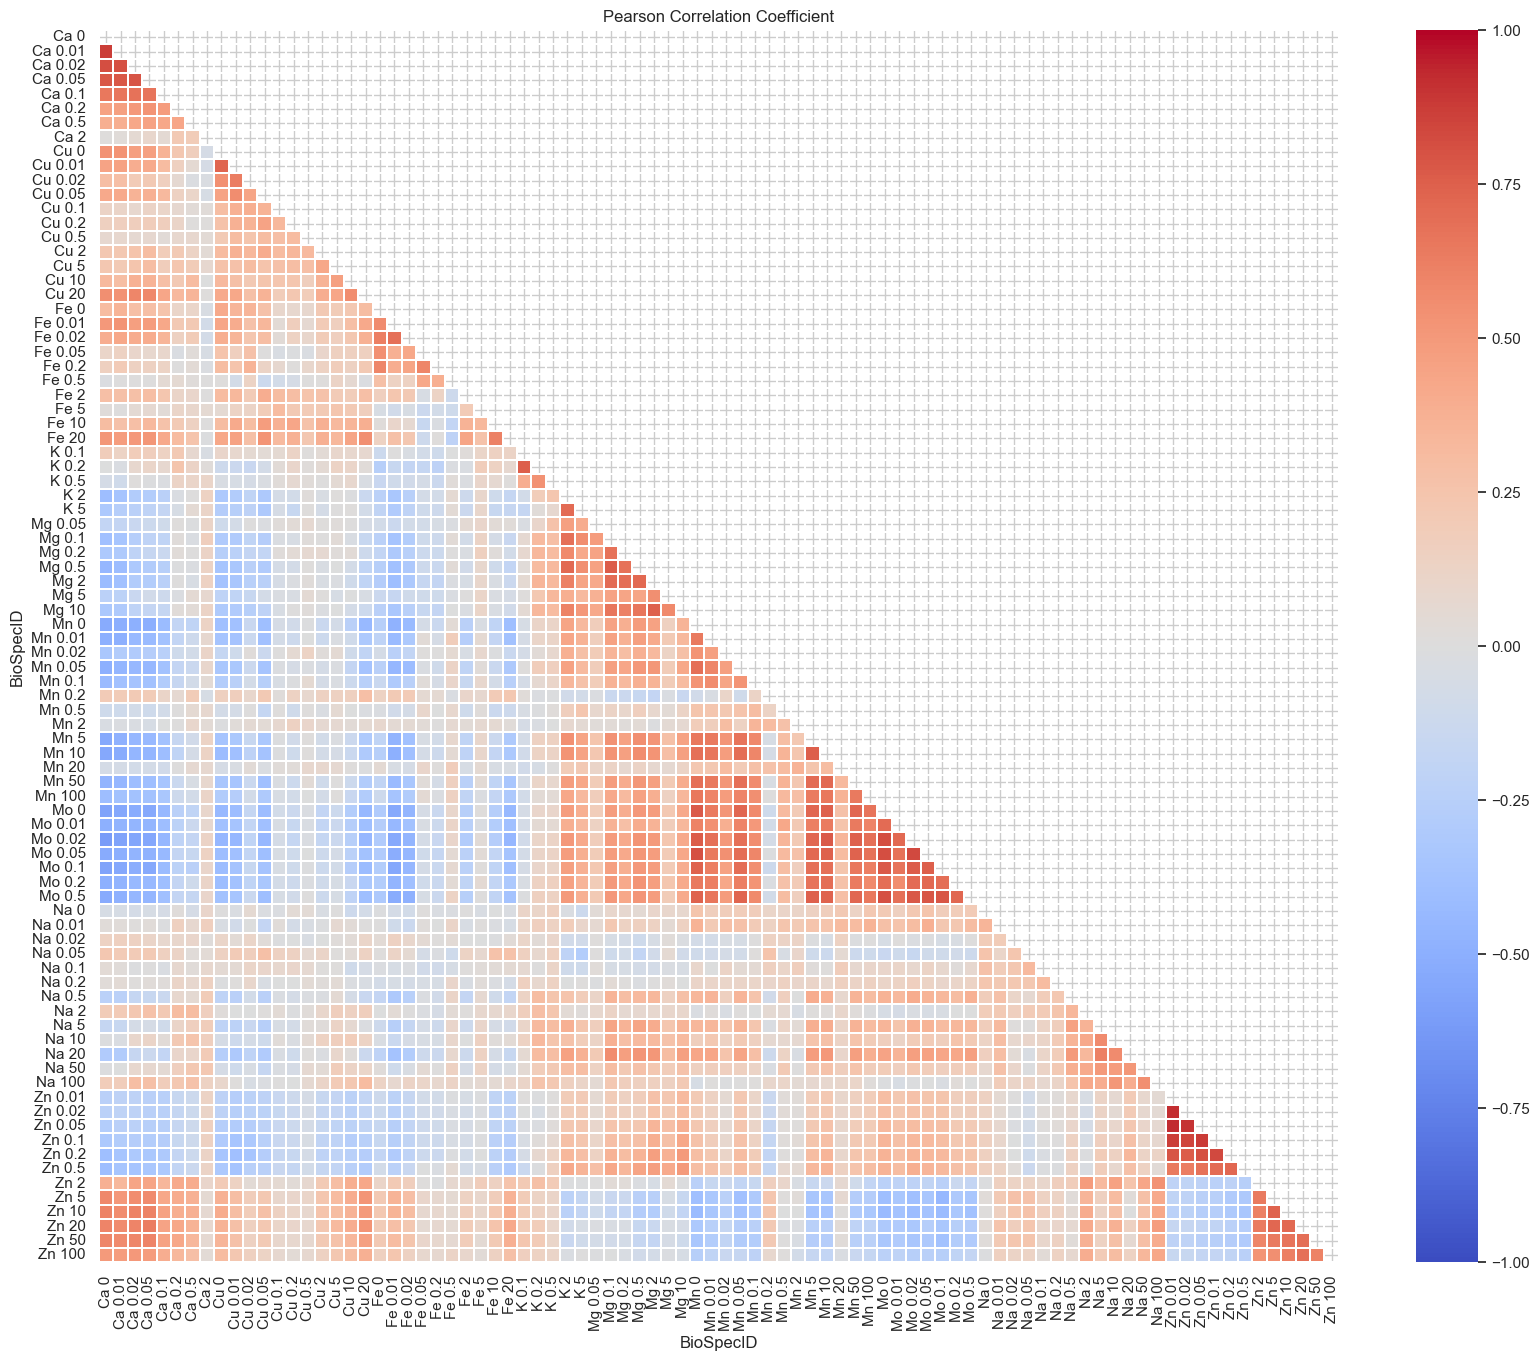

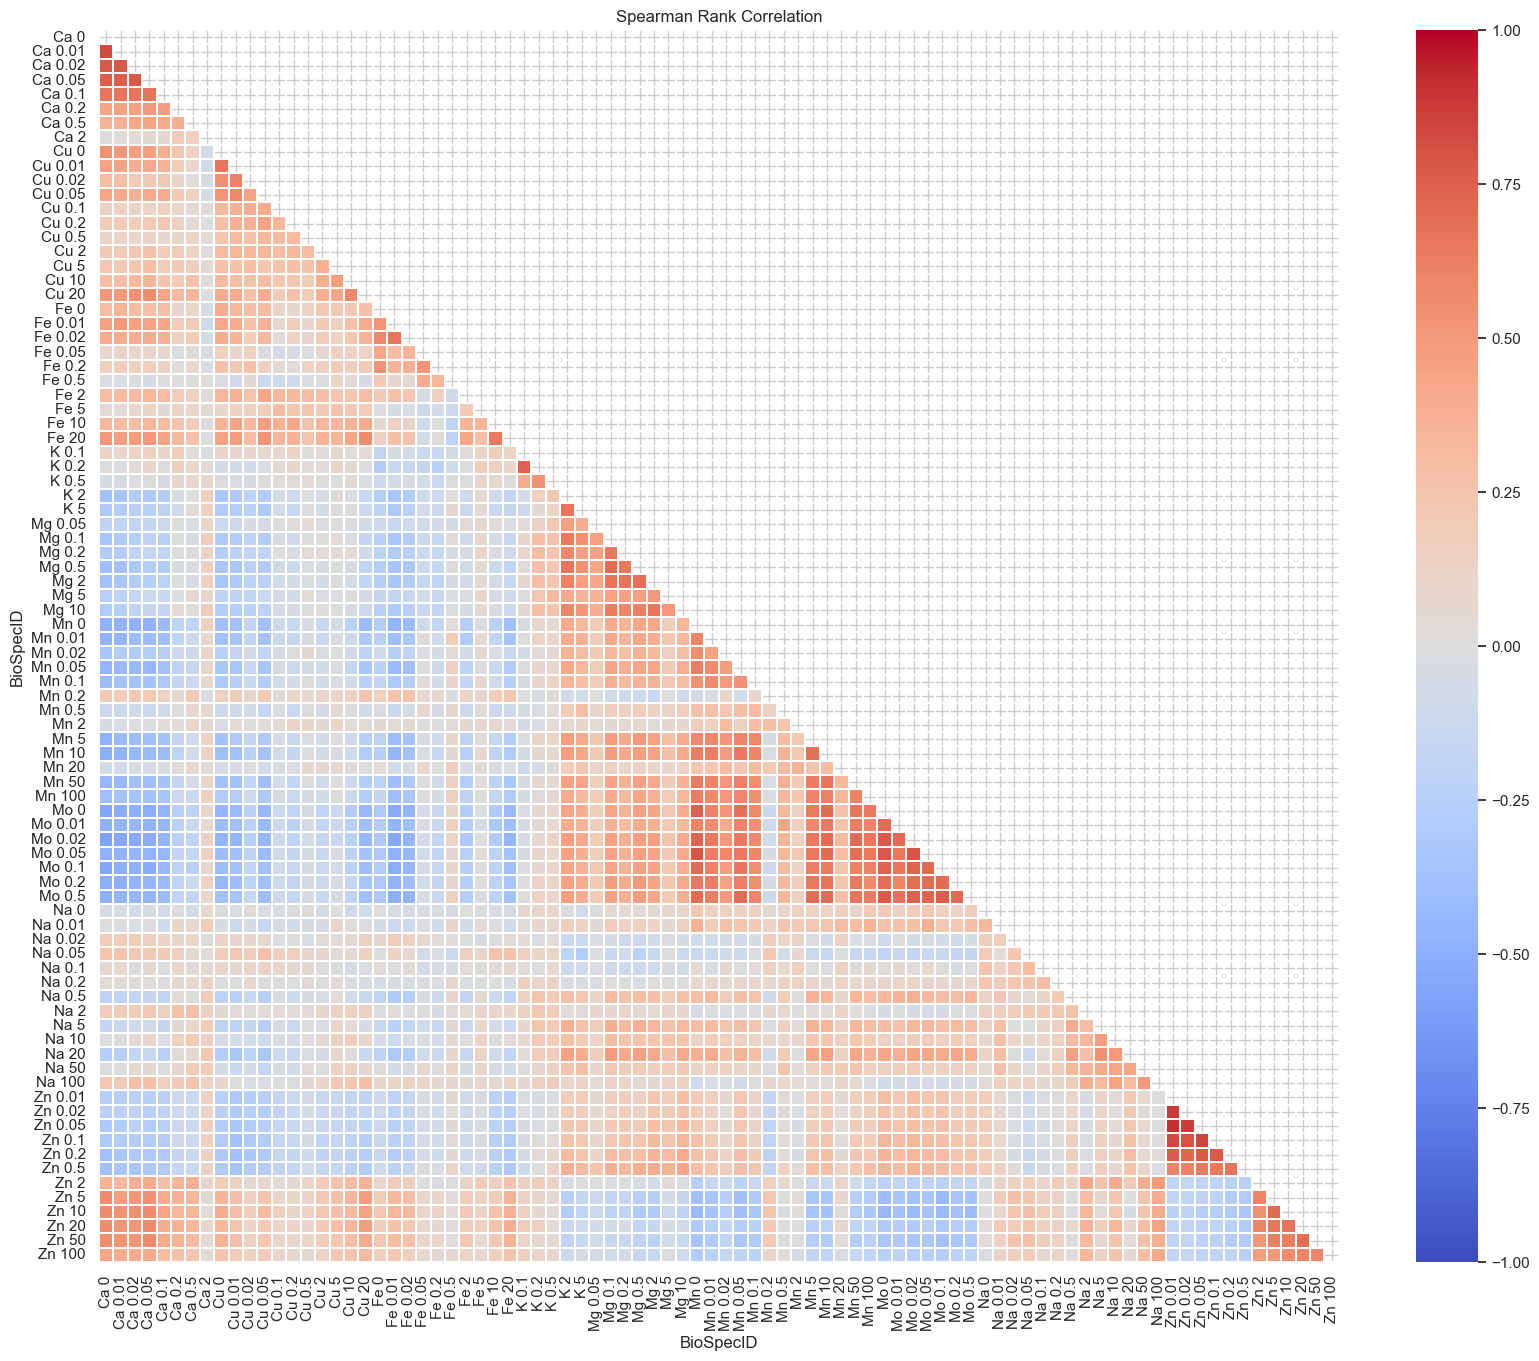

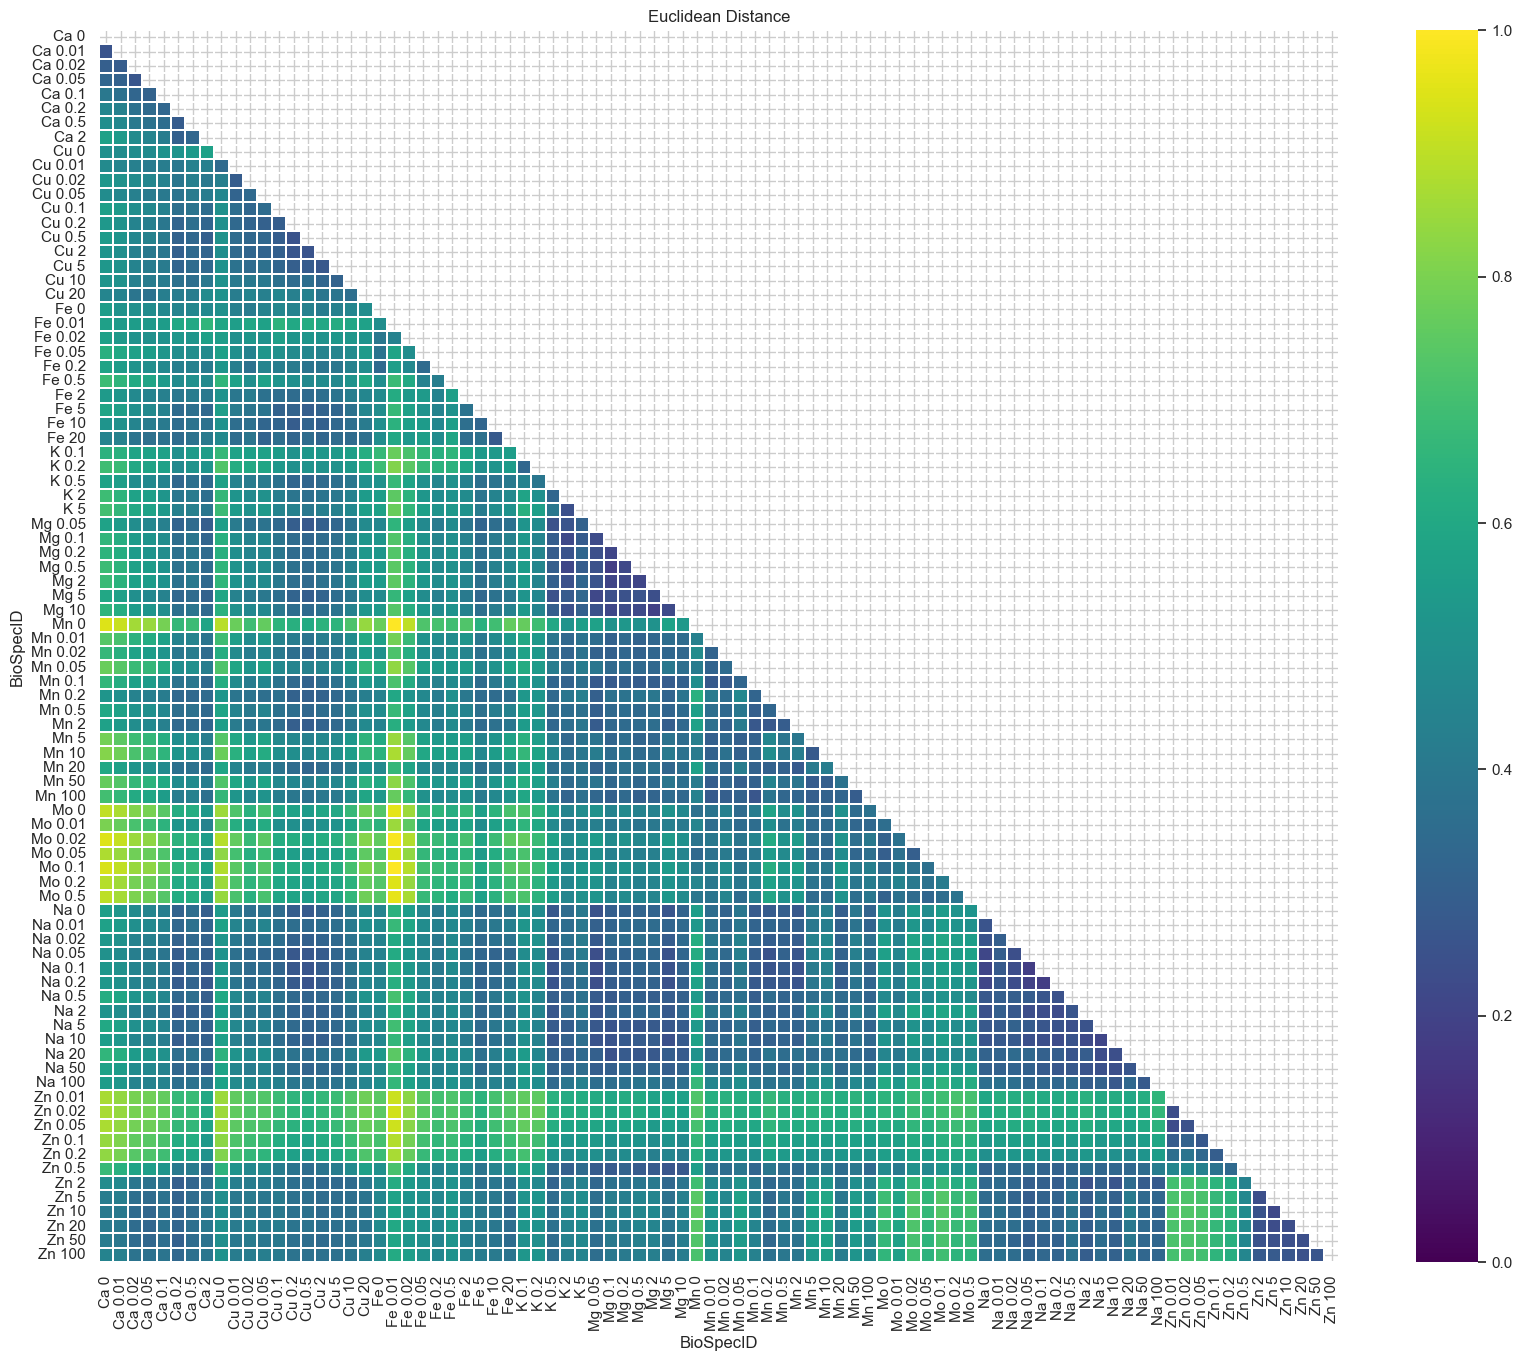

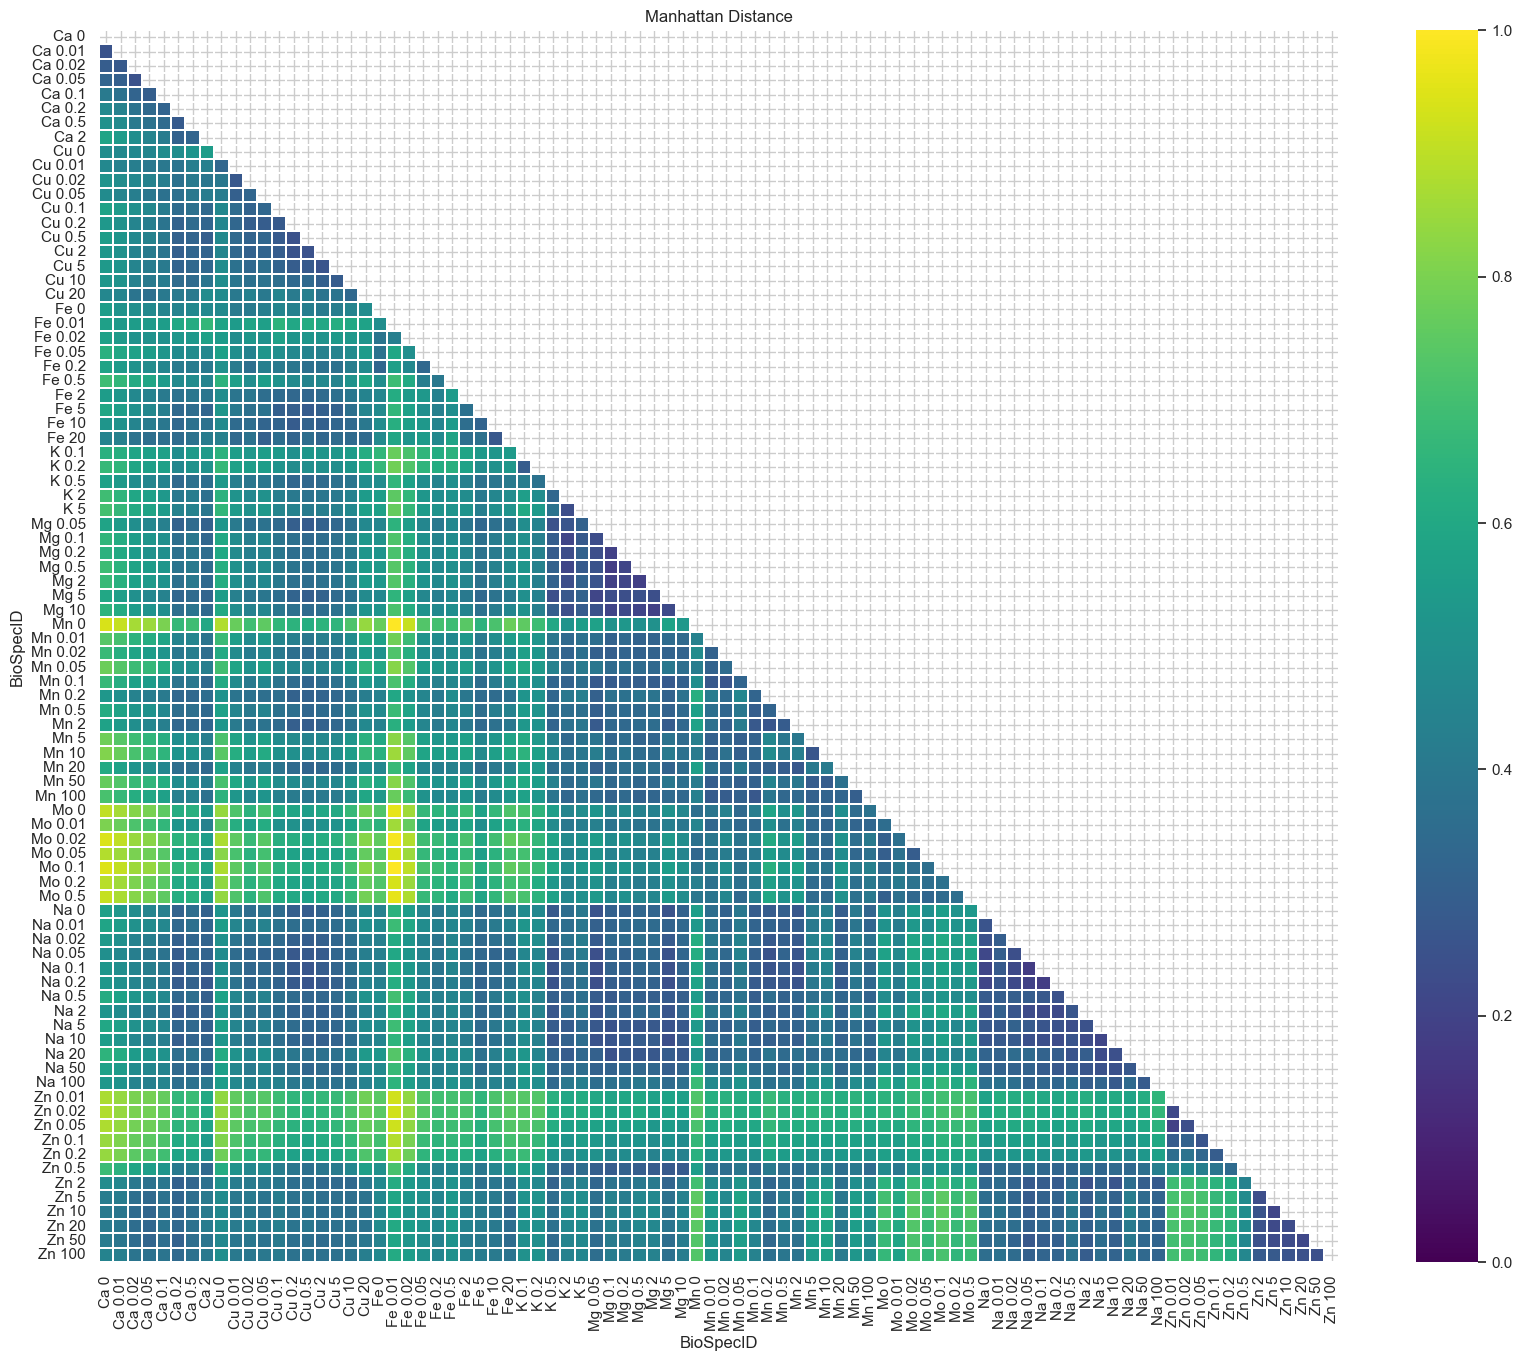

In [17]:
output_dir = '/Users/aulakhs/Documents/RalserLab/metallica/experiment_data/metpert_WTproteomics/output/plots/completematrix/allmetals'

# Define the figure names
proteome_figure_names = [
    'BioSpecID_proteome_pearson_correlation_heatmap.pdf',
    'BioSpecID_proteome_spearman_correlation_heatmap.pdf',
    'BioSpecID_proteome_euclidean_distance_heatmap.pdf',
    'BioSpecID_proteome_manhattan_distance_heatmap.pdf'
]

# Define the dataframes and corresponding methods
proteome_heatmap_dataframes = [proteome_pearson_corr_df, proteome_spearman_corr_df,
                               proteome_euclidean_dist_df, proteome_manhattan_dist_df]
correlation_methods = ['pearson correlation', 'spearman correlation', 'euclidean distance', 'manhattan distance']

# Loop through the dataframes and figure names
for df, figure_name, method in zip(proteome_heatmap_dataframes, proteome_figure_names, correlation_methods):
    
    # Reindex the dataframe based on metal_order
    common_metal_order = [metal for metal in metal_order if metal in df.index]

    df = df.reindex(index=common_metal_order, columns=common_metal_order)
    
    # Create the heatmap
    plt.figure(figsize=(20, 16))
    mask = np.triu(np.ones_like(df, dtype=bool))
    
    # Set the colormap to 'coolwarm' for both Pearson and Spearman correlation
    cmap = 'coolwarm' if 'correlation' in method else 'viridis'
    

    sns.heatmap(df, cmap=cmap,
                 vmin=-1 if 'correlation' in figure_name else 0, vmax=1 if 'correlation' in figure_name else 1,
                linewidths= 0.1,
                annot=False, xticklabels=df.columns, yticklabels=df.index,
                mask=mask)
    
    # Set the title based on the figure name
    if 'pearson' in method:
        plt.title('Pearson Correlation Coefficient')
    elif 'spearman' in method:
        plt.title('Spearman Rank Correlation')
    elif 'euclidean' in method:
        plt.title('Euclidean Distance')
    elif 'manhattan' in method:
        plt.title('Manhattan Distance')
    
    # Save the heatmap as a PDF
    plt.savefig(os.path.join(output_dir, figure_name), format='pdf')
    plt.show()


In [18]:
## write correlation results 
output_dir = '/Users/aulakhs/Documents/RalserLab/metallica/experiment_data/metpert_WTproteomics/output/tables/completematrix/allmetals/allsamples'

# Define filenames for the dataframes
filenames = [
    'proteome_pearson_corr.csv',
    'proteome_spearman_corr.csv',
    'proteome_euclidean_dist.csv',
    'proteome_manhattan_dist.csv'
]

# Write each dataframe to disk
for df, filename in zip(proteome_heatmap_dataframes, filenames):
    df.to_csv(os.path.join(output_dir, filename))
